# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [2]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import matplotlib

import panel as pn
from panel.interact import interact
from panel import widgets
pn.extension()

%matplotlib inline

In [3]:
# import panel as pn
# from panel.interact import interact
# from panel import widgets
# pn.extension()



In [4]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")

#print(map_box_api)

## Load Data

In [5]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [9]:
# # Calculate the number of dwelling types units per year (hint: use groupby and sum)

dwelling_types_units_per_year = to_data.drop(columns=['average_house_value', 'shelter_costs_owned','shelter_costs_rented']).reset_index().groupby('year').sum()
dwelling_types_units_per_year

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [11]:
# Save the dataframe as a csv file

csv_path = Path("Data\dwelling_types_unit_per_year.csv")
dwelling_types_units_per_year.to_csv(csv_path)


In [12]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    fig=plt.figure()
    ax=data.plot.bar(title = title, color=color)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    
    

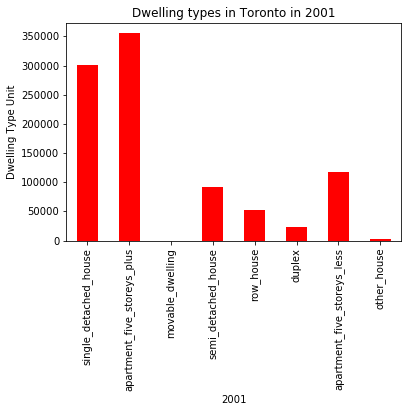

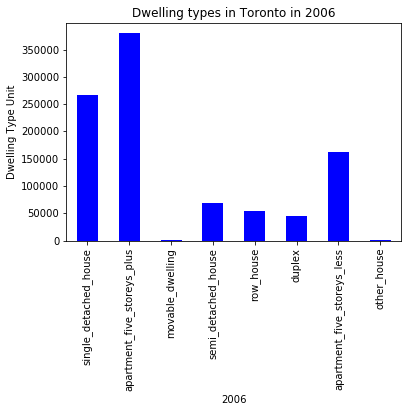

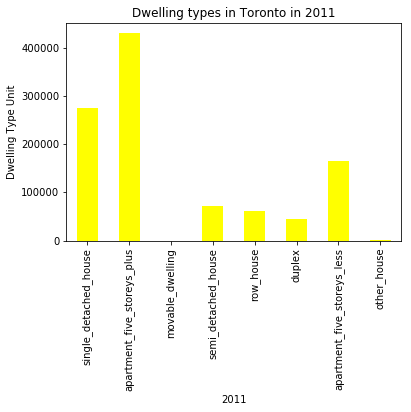

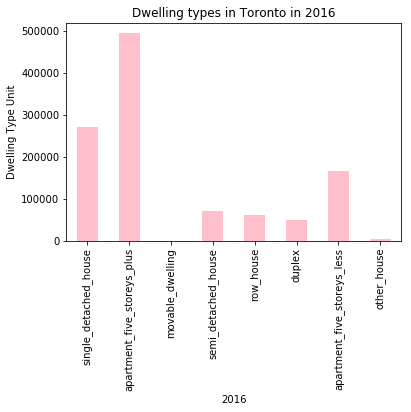

In [13]:
# Bar chart for 2001
create_bar_chart(dwelling_types_units_per_year.loc[2001], "Dwelling types in Toronto in 2001", "2001", "Dwelling Type Unit", "red")

# Bar chart for 2006
create_bar_chart(dwelling_types_units_per_year.loc[2006], "Dwelling types in Toronto in 2006", "2006", "Dwelling Type Unit", "blue")

# Bar chart for 2011
create_bar_chart(dwelling_types_units_per_year.loc[2011], "Dwelling types in Toronto in 2011", "2011", "Dwelling Type Unit", "yellow")

# Bar chart for 2001
create_bar_chart(dwelling_types_units_per_year.loc[2016], "Dwelling types in Toronto in 2016", "2016", "Dwelling Type Unit", "pink")


- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [14]:
# Calculate the average monthly shelter costs for owned and rented dwellings


In [16]:
# Slice for shelter costs owned and shelter costs rented, then group by year and find mean

average_monthly_sheler_cost = to_data[["shelter_costs_owned", "shelter_costs_rented"]].groupby("year").mean()
average_monthly_sheler_cost.head()


,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [18]:
shelter_costs_owned = average_monthly_sheler_cost ["shelter_costs_owned"]
shelter_costs_owned.head()

year
2001     846.878571
2006    1316.800000
2011    1448.214286
2016    1761.314286
Name: shelter_costs_owned, dtype: float64

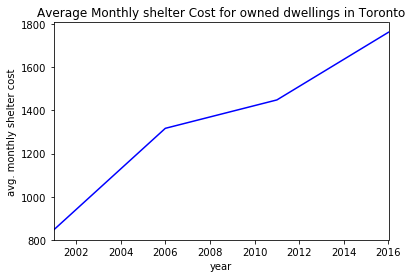

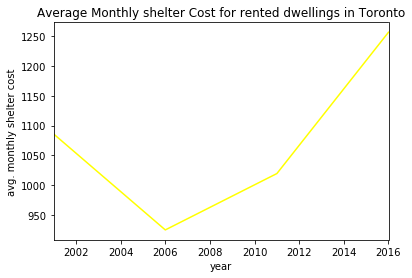

In [19]:

# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    fig=plt.figure()
    ax=data.plot.line(title = title, color=color)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)    
    

# Line chart for owned dwellings    
create_line_chart(average_monthly_sheler_cost["shelter_costs_owned"], "Average Monthly shelter Cost for owned dwellings in Toronto", "year","avg. monthly shelter cost","blue")

# Line chart for rented dwellings
create_line_chart(average_monthly_sheler_cost["shelter_costs_rented"], "Average Monthly shelter Cost for rented dwellings in Toronto", "year","avg. monthly shelter cost","yellow")



## Average House Value per Year

In [20]:
# Calculate the average house value per
# YOUR CODE HERE!
Avg_House_value_per_year = to_data['average_house_value'].groupby('year').mean()
Avg_House_value_per_year.head()

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

Text(0.5, 0, 'year')

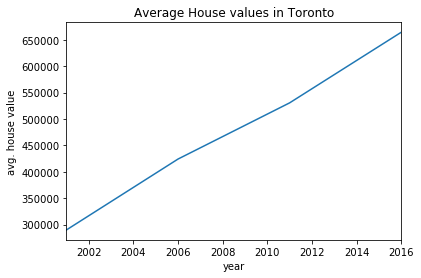

In [21]:
# Plot the average house value per year as a line chart

ax=Avg_House_value_per_year.plot.line(title = "Average House values in Toronto")
ax.set_ylabel("avg. house value")
ax.set_xlabel("year")



- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [22]:
# Create a new DataFrame with the mean house values by neighbourhood per year

df = to_data[['neighbourhood','average_house_value']].reset_index()
df.head()

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864


In [23]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood

df.hvplot( x="year",y="average_house_value",groupby="neighbourhood", title="average house value by neighbourhood")

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean number of dwelling types for each year and neighbourhood.

In [24]:
# Fetch the data of all dwelling types per year


number_of_dweliing_types_per_year = to_data.drop(columns=['average_house_value', 'shelter_costs_owned','shelter_costs_rented']).reset_index()

number_of_dweliing_types_per_year.head()


,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0
2,2001,Alderwood,3175,315,0,470,50,185,370,0
3,2001,Annex,1060,6090,5,1980,605,275,3710,165
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0


In [25]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood

number_of_dweliing_types_per_year.set_index('year').hvplot(kind="bar", stacked=False, groupby="neighbourhood",  xlabel="Year", ylabel="Dwelling Type Units",
     rot=90, height=500, width=700
)


:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [27]:
# Getting the data from the top 10 expensive neighbourhoods

to_data.head()

new_df = to_data.groupby("neighbourhood").mean().sort_values("average_house_value", ascending=False).reset_index()


top_10_exp_neighbouthood = to_data.groupby("neighbourhood").mean(
).sort_values("average_house_value", ascending=False).reset_index().iloc[0:10]

top_10_exp_neighbouthood


,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Bridle Path-Sunnybrook-York Mills,2260.00,331.25,0.00,36.25,90.00,25.0,40.00,0.00,1526485.75,2360.75,2321.75
1,Forest Hill South,1742.50,2031.25,1.25,61.25,45.00,75.0,1027.50,3.75,1195992.50,1781.00,1313.75
2,Lawrence Park South,3472.50,773.75,0.00,126.25,38.75,225.0,966.25,16.25,1094027.75,1954.00,1372.75
3,Rosedale-Moore Park,2498.75,4641.25,0.00,486.25,245.00,327.5,1618.75,2.50,1093640.00,1909.75,1537.25
4,St.Andrew-Windfields,3225.00,1670.00,0.00,185.00,552.50,97.5,586.25,5.00,999107.00,1880.25,1384.50
5,Casa Loma,916.25,2310.00,0.00,288.75,201.25,162.5,1192.50,2.50,981064.25,1873.75,1547.75
6,Bedford Park-Nortown,4865.00,1981.25,0.00,43.75,57.50,287.5,1275.00,88.75,930415.25,1786.75,1255.00
7,Forest Hill North,1488.75,3392.50,0.00,12.50,16.25,82.5,402.50,1.25,851680.50,1722.75,1245.50
8,Kingsway South,2326.25,576.25,0.00,66.25,48.75,20.0,336.25,2.50,843234.25,1736.75,1622.00
9,Yonge-St.Clair,565.00,3948.75,0.00,425.00,212.50,172.5,1308.75,6.25,813220.25,1680.75,1369.00


In [28]:
# Plotting the data from the top 10 expensive neighbourhoods


top_10_exp_neighbouthood[['neighbourhood','average_house_value']].hvplot.bar(title="Top 10 Expensive neighbourhoods in Toronto", x="neighbourhood", y="average_house_value",
     rot=90, height=500
)

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Cost Analysis

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [29]:
# YOUR CODE HERE!

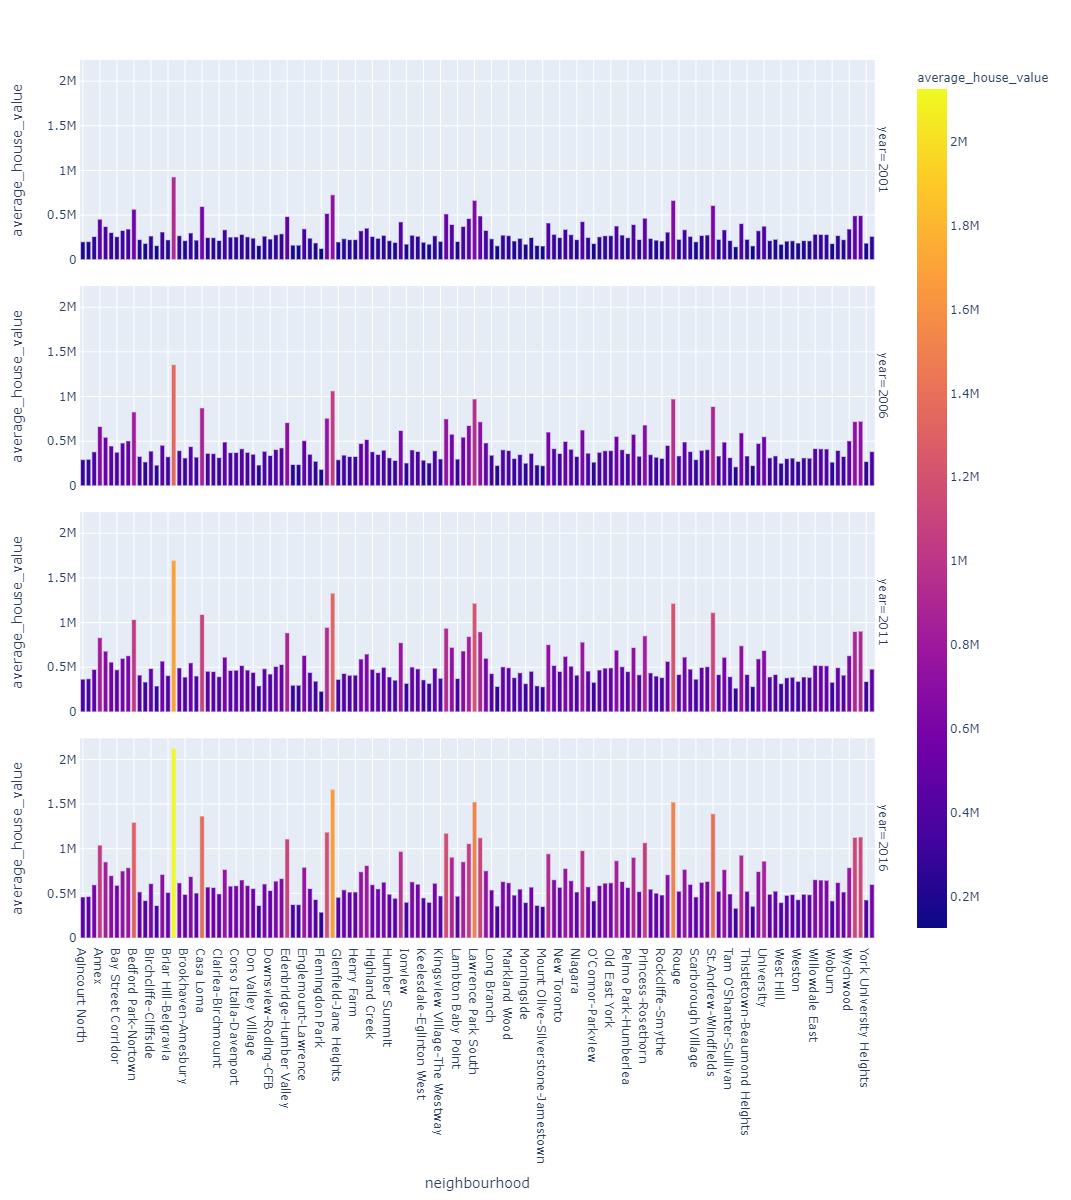

In [30]:
#Average house values for all Toronto's neighbourhoods per year

house_values = to_data[['neighbourhood', 'average_house_value']].reset_index()

house_values.head()
average_house_value = px.bar(house_values, x="neighbourhood", y="average_house_value",
    color="average_house_value", facet_row="year", height=1200, width=900
)

average_house_value.show()



### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [31]:
# Fetch the data from all expensive neighbourhoods per year.

most_expensive = to_data.reset_index().sort_values(["year","average_house_value"], ascending=False).groupby("year").head(10)
most_expensive.head()


,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
436,2016,Bridle Path-Sunnybrook-York Mills,2275,590,0,40,230,30,80,0,2124653,2903,2942
464,2016,Forest Hill South,1685,2025,0,65,40,70,1050,0,1664653,2383,1486
489,2016,Lawrence Park South,3420,925,0,110,35,230,1015,5,1522732,2644,1515
524,2016,Rosedale-Moore Park,2450,4990,0,485,260,345,1505,5,1522193,2498,1809
531,2016,St.Andrew-Windfields,3245,1745,0,175,540,120,595,5,1390616,2516,1565


- - - 

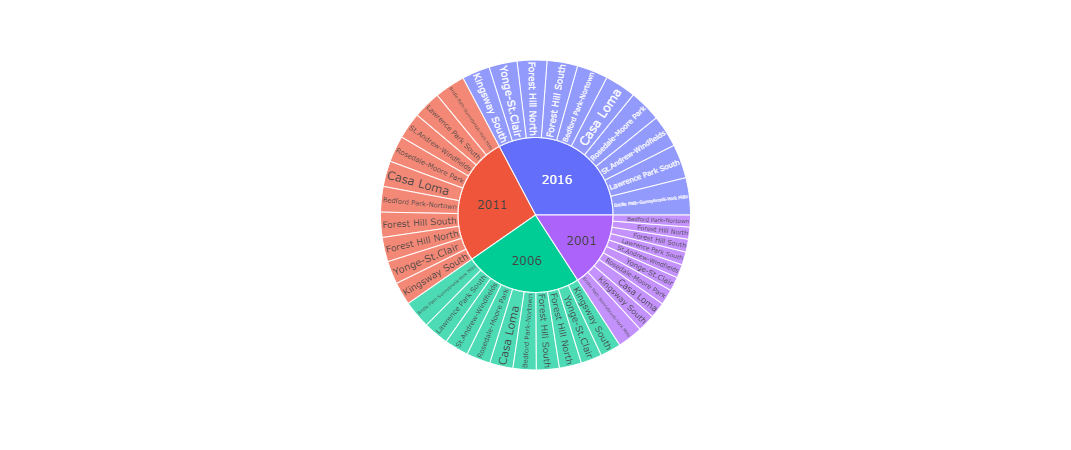

In [32]:
# Create the sunburst chart


fig = px.sunburst(most_expensive, path=['year', 'neighbourhood'], values='shelter_costs_owned')
fig.show()

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [33]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


In [35]:
#Set index
neighbourhood_locations = df_neighbourhood_locations.set_index("neighbourhood")

neighbourhood_locations.head()

,lat,lon
neighbourhood,,
Agincourt North,43.805441,-79.266712
Agincourt South-Malvern West,43.788658,-79.265612
Alderwood,43.604937,-79.541611
Annex,43.671585,-79.404001
Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [36]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
to_data.head()

neighbourhood_mean_values = to_data.groupby("neighbourhood").mean()
neighbourhood_mean_values.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


In [41]:
# Join the average values with the neighbourhood locations

avg_house_values = pd.concat([neighbourhood_locations, neighbourhood_mean_values], axis=1).reset_index()
avg_house_values.head()
s.head()

,neighbourhood,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


In [42]:
# # Read the Mapbox API key
# load_dotenv()
# map_box_api = os.getenv("MAPBOX_API_KEY")



# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

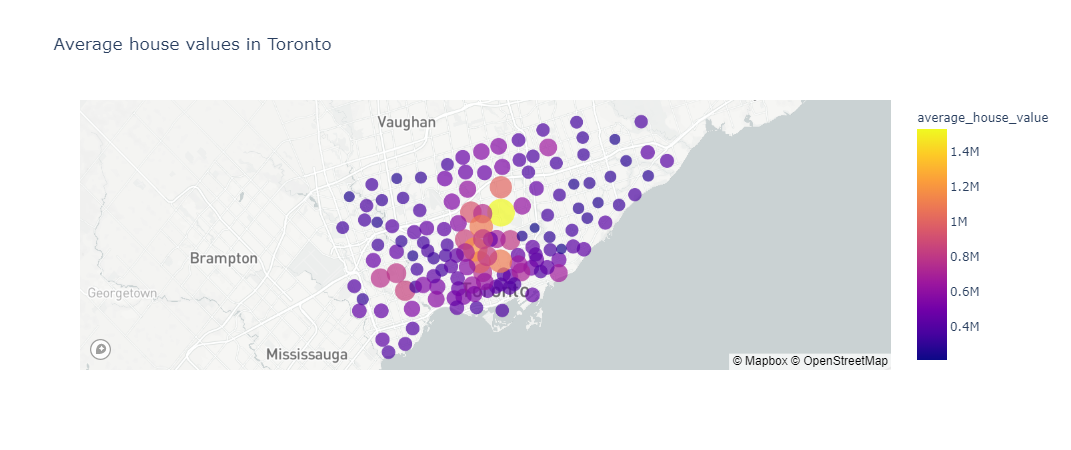

In [44]:
# Create a scatter mapbox to analyze neighbourhood info


map = px.scatter_mapbox(
    avg_house_values,
    lat="lat",
    lon="lon",
    size="average_house_value",
    color="average_house_value",
    title="Average house values in Toronto",
    zoom=9,
    hover_name = "neighbourhood",  
    hover_data = ["single_detached_house",
                  "apartment_five_storeys_plus",
                  "movable_dwelling",
                  "semi_detached_house",
                  "row_house",
                  "duplex",
                  "apartment_five_storeys_less",
                  "other_house"]
)

map.show()